In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

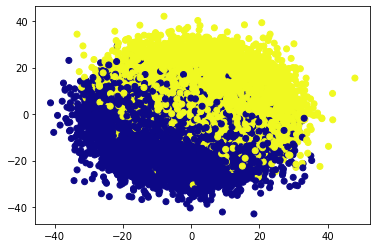

In [41]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации
n_features = 4
n_objects = 100000

w_true = np.random.randint(0, 100, (n_features, ))

X_0 = np.ones((n_objects, n_features))
for i in range(1, n_features):
    X_0[:,i]*=np.random.normal(0,10,(n_objects,))


y_00 = X_0 @ w_true + np.random.normal(0,10,(n_objects, ))
y_00 = (y_00 - y_00.mean()) / y_00.std()
y_00 = np.where(y_00 > 0, np.ones_like(y_00), np.zeros_like(y_00))
plt.scatter(X_0[:, 1], X_0[:, 2], c=y_00, cmap='plasma')

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу.
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

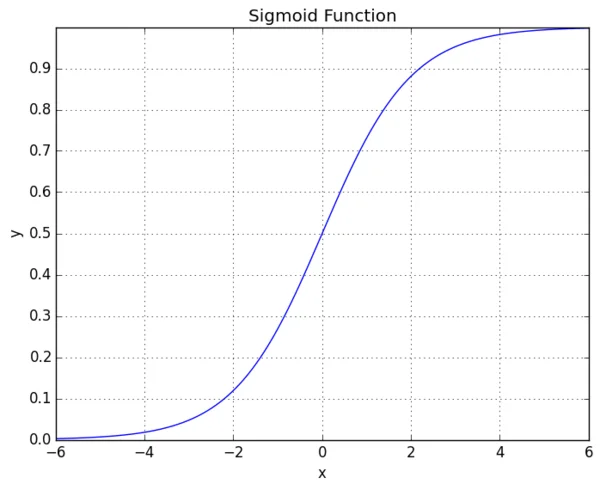

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)
![jupyter](https://i.imgur.com/MLbitIb.png)

#### Задание №2. Напишите собственную логистическую регрессию

In [72]:
class MyLogRegression():
    
    def __init__(self, batch_size=25, num_steps=1000, lr=1e-2):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
    
    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        def a(X):
            return 1/(1 + np.exp(-X))
        
        def grad(X, w, Y):
            return X.T @ (a(w.T @ X.T) - Y).T

        for _ in range(self.num_steps):
            sample_indices = np.random.randint(n_objects, size=self.batch_size)
            w -= self.lr * grad(X[sample_indices], w, Y[sample_indices, None].T)

        self.w = w
        return self
    
    def predict(self, X):
        return X @ self.w

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_0, y_00, test_size=0.3)

my_model = MyLogRegression()
my_model.fit(X_train, y_train)

sklearn_model = LogisticRegression(penalty="none")
sklearn_model.fit(X_train, y_train)

print(accuracy_score(y_test, my_model.predict(X_test) > 0.5))
print(accuracy_score(y_test, sklearn_model.predict(X_test) > 0.5))

0.9950333333333333
0.9967
